régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apériodique
régime apéri

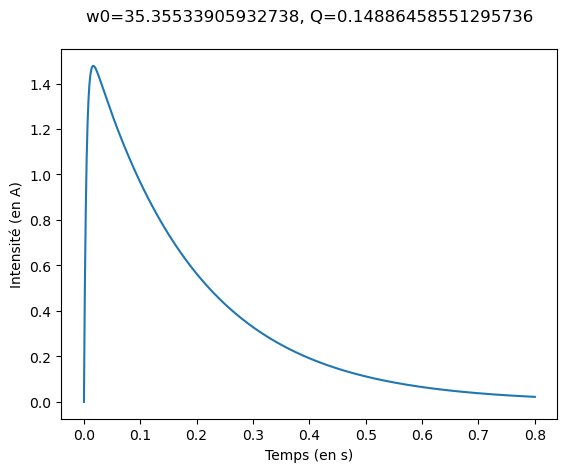

In [1]:
"""
Auteurs: ELOUAHDANI Salim et GUENNOUNI Yassine
Date et lieu: Année 2022/2023 au Lycée Henri Poincaré
Description: Simulation du courant dans un circuit RLC
"""

"""
BIBLIOTHEQUES
"""

import math as math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

"""
PARAMETRES
"""
# Définition des variables
Rbob=4*(10**-2) #Largeur de la bobine
Lbob=8.5*(10**-2) #Longeur de la bobine
μ0=1.257*(10**(-6)) #Constance magnétique
Nbob=1000  #Nombre de spire
n=Nbob/Lbob
C=0.01 #Capacité du condensateur
R=19   #Résistance
L=0.08 #Induction de la Bobine
E=30 #Tension aux bornes du GBF       
w0=1/((L*C)**0.5)  #Pulsation propre du circuit RLC série
Q=1/R*((L/C)**0.5) #Facteur de qualité
rmoins=-w0/(2*Q)-w0/(2*Q)*((1-4*Q**2)**0.5)
rplus=-w0/(2*Q)+w0/(2*Q)*((1-4*Q**2)**0.5)
l=0.4 #Distance pour les bornes du tracé
M=6.8 #Moment magnétique 
m=0.051 #Masse de l'aimant  

"""
FONCTIONS
"""

# Définition des fonctions utiles
def régime_critique (t):
    print('régime critique')
    # print("critique",Q,1/(2))
    return E*math.exp(-R/(2*L)*t)+E*R/(2*L)*t*math.exp(-R/(2*L)*t)

def i_régime_critique (t):
    print('régime critique')
    r=w0/(2*Q)
    return (-r**2)*E*C*math.exp(r*t)

def régime_apériodique (t):
    rmoins=-w0/(2*Q)-(w0/(2*Q))*((1-4*Q**2)**0.5)
    rplus=-w0/(2*Q)+(w0/(2*Q))*((1-4*Q**2)**0.5)
    print('régime apériodique',rplus,rmoins,w0/(2*Q))
    return rmoins*E/(rmoins-rplus)*math.exp(rplus*t)+rplus*E/(rplus-rmoins)*math.exp(rmoins*t)

def i_régime_apériodique (t):
    print('régime apériodique')
    rmoins=-w0/(2*Q)-w0/(2*Q)*((1-4*Q**2)**0.5)
    rplus=-w0/(2*Q)+w0/(2*Q)*((1-4*Q**2)**0.5)
    return (rmoins*rplus*E*C)/(rmoins-rplus)*(math.exp(rplus*t)-math.exp(rmoins*t))

def régime_pseudo_périodique (t):
    print('régime pseudo périodique')
    p=-R/(2*L)
    q=w0*((4-(1/Q)**2)**0.5)
    # print("pseudo_périodique",Q,1/(2**0.5),q)
    return E*math.exp(p*t)*math.cos(q*t)+p/q*E*math.exp(p*t)*math.sin(q*t)

def i_régime_pseudo_périodique (t):
    print('régime pseudo périodique')
    p=-R/(2*L)
    q=w0*((4-(1/Q)**2)**0.5)
    # print(p)
    # print(p**2)
    return -E*C*math.exp(p*t)*math.sin(q*t)*((p**2)/q+q)

def i(temps):
    if Q==1/2:
        return i_régime_critique(temps)
    elif Q<1/(2) :
        return i_régime_apériodique(temps)
    elif Q>1/(2):
        return i_régime_pseudo_périodique(temps)

t=np.linspace(0,0.8,1000)
intensité=[-i(temps) for temps in t]

plt.plot(t,intensité)
plt.title('w0='+str(w0)+', Q='+str(Q),pad=20)
plt.xlabel('Temps (en s)')
plt.ylabel('Intensité (en A)')
plt.show()